In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import statistics
from scipy import stats
%matplotlib inline

In [26]:
df = pd.read_excel ('Data Sample (AIC) для итоговой работы .xlsx')


# Информация  о датасете

Это транснациональный набор данных, который содержит все транзакции, совершенные в период с 01.12.2010 г. по 09.12.2011 г. для зарегистрированной в Великобритании розничной сети, не связанной с магазином. В основном компания продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.

InvoiceNo: номер счета. Номинальное, 6-значное целое число, однозначно присвоенное каждой транзакции. Если этот код начинается с буквы «с», это означает отмену.

StockCode: код товара (товара). Номинальное, пятизначное целое число, однозначно присвоенное каждому отдельному продукту.

Description: Название товара (предмета). Номинальная.

Quantity: количество каждого продукта (товара) за транзакцию. Числовой.

InvoiceDate: Invice Дата и время. Числовой, день и время создания каждой транзакции.

UnitPrice: цена за единицу. Числовой, Цена товара за единицу в стерлингах.

CustomerID: номер клиента. Номинальное, пятизначное целое число, однозначно присвоенное каждому клиенту.

Country: Название страны. Номинальное, название страны, где проживает каждый клиент.

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom


In [28]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
InvoiceNo      54214 non-null object
StockCode      54214 non-null object
Description    54080 non-null object
Quantity       54214 non-null int64
InvoiceDate    54214 non-null datetime64[ns]
UnitPrice      54214 non-null float64
CustomerID     40643 non-null float64
Country        54214 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.3+ MB


In [29]:
#удалим нулевые значения
df2 = df.dropna()

In [30]:
print(np.shape(df2))

(40643, 8)


In [31]:
corr_matrix = df2.corr()
corr_matrix

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.013069,-0.018323
UnitPrice,-0.013069,1.000000,-0.005403
CustomerID,-0.018323,-0.005403,1.000000


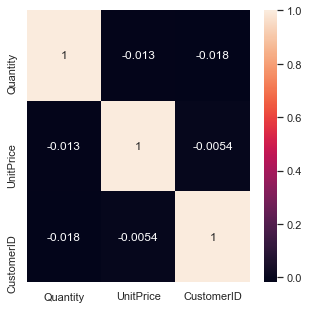

In [36]:
sns.set(rc=({'figure.figsize':(5, 5)}))
sns.heatmap(corr_matrix, annot=True)

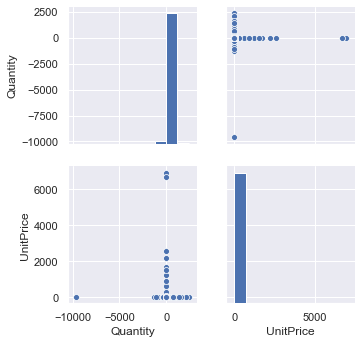

In [33]:
sns.pairplot(df, vars=['Quantity', 'UnitPrice'], kind="scatter")

In [34]:
print(stats.ttest_ind(df2['Quantity'], df2['UnitPrice']))

Ttest_indResult(statistic=30.374487529209905, pvalue=1.6134679055306458e-201)


Значение p-value значительно больше 0,05. Между выбранными переменными не существует значительной связи. 


In [ ]:
Итак, мы видим небольшую отрицательную корреляцию между выбранными переменными - ценой товара и количеством продаж этих товаров.
Снижение цены товара не сильно влияет на количество купленных товаров. Предлагаю отвергнуть выдвинутую гипотезу и подумать еще.